In [11]:
# Importing the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop

In [12]:
insurance_data = pd.read_csv('insurance.csv')

In [13]:
insurance_data.isnull().sum()

index       0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [14]:
insurance_data['sex'].unique()

array(['female', 'male'], dtype=object)

In [15]:
# Converting bool types to be numeric 
from sklearn.preprocessing import LabelEncoder
le_encoder = LabelEncoder()
insurance_data['sex'] = le_encoder.fit_transform(insurance_data['sex'])
le_encoder = LabelEncoder()
insurance_data['smoker'] = le_encoder.fit_transform(insurance_data['smoker'])
le_encoder = LabelEncoder()
insurance_data['region'] = le_encoder.fit_transform(insurance_data['region'])

In [16]:
insurance_data

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,0,27.900,0,1,3,16884.92400
1,1,18,1,33.770,1,0,2,1725.55230
2,2,28,1,33.000,3,0,2,4449.46200
3,3,33,1,22.705,0,0,1,21984.47061
4,4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...,...
1333,1333,50,1,30.970,3,0,1,10600.54830
1334,1334,18,0,31.920,0,0,0,2205.98080
1335,1335,18,0,36.850,0,0,2,1629.83350
1336,1336,21,0,25.800,0,0,3,2007.94500


<Axes: xlabel='charges'>

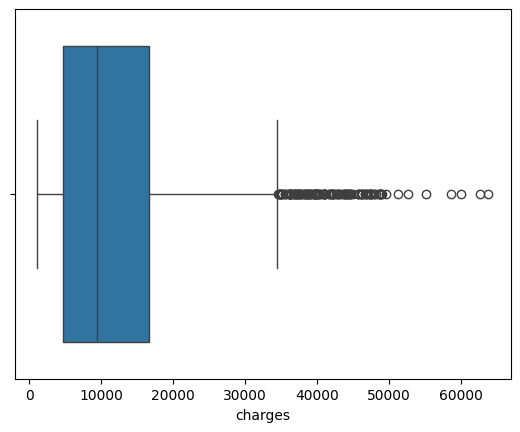

In [17]:
# Plotting the outliers
import seaborn as sns
sns.boxplot(insurance_data['charges'], orient = 'h')

Train and Test Data

In [18]:
# Getting input and output data
X = insurance_data.drop(['charges'], axis = 1)
Y = insurance_data['charges']

In [19]:
# Splitting the data for testing and training
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state = 3)

ANN Regression Model

In [20]:
# Model Building
def build_model():
  model = Sequential()
  # Input Layer
  model.add(Dense(units =  128, activation = 'relu', input_shape = [len(X.keys())]))
  # Hidden Layer - I
  model.add(Dense(units =  256, activation = 'relu'))
  # Hidden Layer - II
  model.add(Dense(units =  512, activation = 'relu'))
  # Output Layer
  model.add(Dense(units =1))
  # Optimizer
  model.compile(loss = 'mean_squared_error',optimizer = 'RMSprop', metrics = ['mean_squared_error', 'mean_absolute_error'])
  return model

In [21]:
model = build_model()

c:\Users\Satgu\projects\mozilla\mozilla\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
# Training Model
history = model.fit(x_train, y_train, epochs = 1000, batch_size = 30, validation_split = 0.2)

Epoch 1/1000
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 277856256.0000 - mean_absolute_error: 11623.3281 - mean_squared_error: 277856256.0000 - val_loss: 142524560.0000 - val_mean_absolute_error: 8421.4707 - val_mean_squared_error: 142524560.0000
Epoch 2/1000
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 195963648.0000 - mean_absolute_error: 10106.4785 - mean_squared_error: 195963664.0000 - val_loss: 135353408.0000 - val_mean_absolute_error: 8086.6021 - val_mean_squared_error: 135353408.0000
Epoch 3/1000
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 187444592.0000 - mean_absolute_error: 9995.1289 - mean_squared_error: 187444592.0000 - val_loss: 127872184.0000 - val_mean_absolute_error: 8059.3896 - val_mean_squared_error: 127872184.0000
Epoch 4/1000
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 173954960.0000 - mean_absolute_error: 9600.1133 - mean_squared_error: 173954960.0000 - val_loss: 112571104.0000 - val_mean_absolute_error: 7247.0562 - val_mean_squared_error: 112571104.00

In [24]:
# Predicting data
y = model.predict(x_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [25]:
results = pd.DataFrame(y, columns = ['Predicted_Value'])

In [26]:
results['Actual_Value'] = np.array(y_test)

<Axes: >

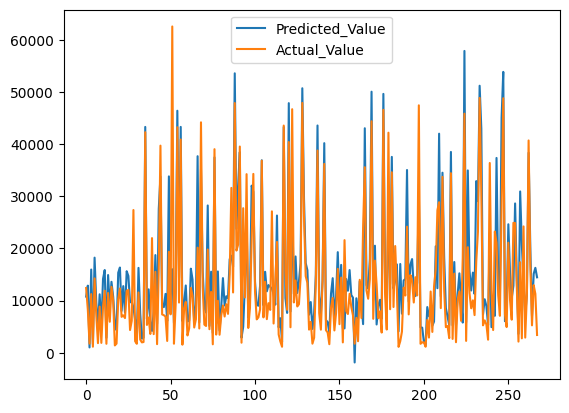

In [27]:
# Plotting actual vs predicted data
results.plot()